In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

sns.set_style("whitegrid")

path = kagglehub.dataset_download("piterfm/2022-ukraine-russian-war")
print("Path to dataset files:", path)

equipment_file = os.path.join(path, 'russia_losses_equipment.csv')
personnel_file = os.path.join(path, 'russia_losses_personnel.csv')

df_eq = pd.read_csv(equipment_file)
df_pers = pd.read_csv(personnel_file)

df_eq['date'] = pd.to_datetime(df_eq['date'])
df_pers['date'] = pd.to_datetime(df_pers['date'])

C:\Users\gomer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|█████████████████████████████████████████████████████████████████████████████| 46.6k/46.6k [00:00<00:00, 4.76MB/s]

Extracting files...
Path to dataset files: C:\Users\gomer\.cache\kagglehub\datasets\piterfm\2022-ukraine-russian-war\versions\472


In [14]:
df_eq = df_eq.sort_values(by='date', ascending=True)
df_pers = df_pers.sort_values(by='date', ascending=True)

df_eq['APC_daily'] = df_eq['APC'].diff().fillna(df_eq['APC'])
df_pers['personnel_daily'] = df_pers['personnel'].diff().fillna(df_pers['personnel'])

df_merged = pd.merge(df_eq[['date', 'day', 'APC_daily']], 
                     df_pers[['date', 'personnel_daily']], 
                     on='date')

df_eq = df_eq.sort_values(by='date', ascending=False)

print("Дані успішно перераховано.")

Дані успішно перераховано.


In [13]:
print("--- Завдання 1: Добові втрати БТР (останні 5 днів) ---")
display(df_eq[['date', 'APC_daily']].head())

--- Завдання 1: Добові втрати БТР (останні 5 днів) ---


,date,APC_daily
0,2025-11-30,14.0
1,2025-11-29,15.0
2,2025-11-28,15.0
3,2025-11-27,3.0
4,2025-11-26,1.0


In [15]:
top_5_losses = df_eq.nlargest(5, 'APC_daily')[['date', 'APC_daily']]
print("--- Завдання 2: ТОП-5 днів з найбільшими втратами БТР ---")
display(top_5_losses)

--- Завдання 2: ТОП-5 днів з найбільшими втратами БТР ---


,date,APC_daily
1374,2022-02-25,516.0
1373,2022-02-26,190.0
772,2023-10-20,120.0
1371,2022-02-28,110.0
1355,2022-03-16,96.0


In [16]:
summer_2024_start = '2024-06-01'
summer_2024_end = '2024-08-31'

summer_losses = df_eq[
    (df_eq['date'] >= summer_2024_start) & 
    (df_eq['date'] <= summer_2024_end)
]['APC_daily'].sum()

print(f"--- Завдання 3: Втрати БТР влітку 2024 року ({summer_2024_start} - {summer_2024_end}) ---")
print(f"Всього знищено: {int(summer_losses)} одиниць.")

--- Завдання 3: Втрати БТР влітку 2024 року (2024-06-01 - 2024-08-31) ---
Всього знищено: 1801 одиниць.


In [17]:
mean_losses_100_500 = df_eq[
    (df_eq['day'] >= 100) & 
    (df_eq['day'] <= 500)
]['APC_daily'].mean()

print("--- Завдання 4: Середнє значення втрат БТР з 100 по 500 день війни ---")
print(f"Середні втрати: {mean_losses_100_500:.2f} одиниць на день.")

--- Завдання 4: Середнє значення втрат БТР з 100 по 500 день війни ---
Середні втрати: 11.47 одиниць на день.


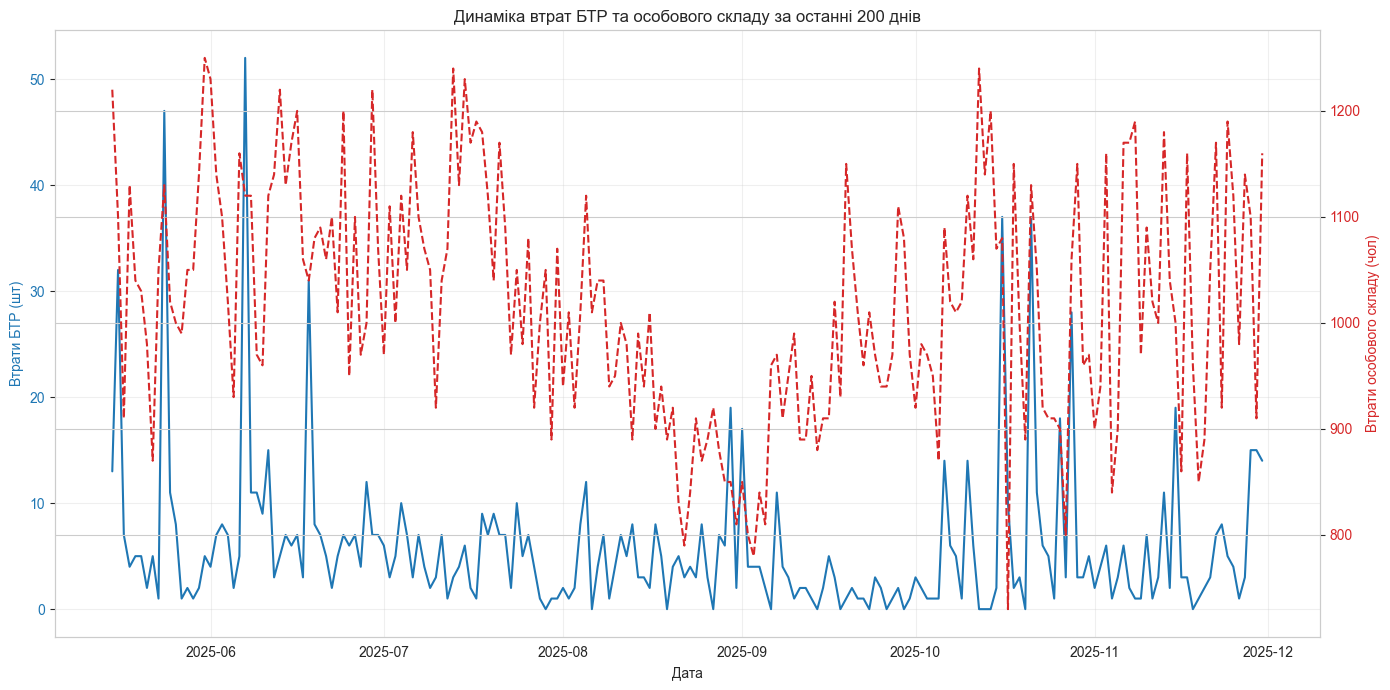

In [18]:
df_last_200 = df_merged.tail(200)

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Дата')
ax1.set_ylabel('Втрати БТР (шт)', color=color)
ax1.plot(df_last_200['date'], df_last_200['APC_daily'], color=color, label='БТР (APC)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Втрати особового складу (чол)', color=color)
ax2.plot(df_last_200['date'], df_last_200['personnel_daily'], color=color, linestyle='--', label='Особовий склад')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Динаміка втрат БТР та особового складу за останні 200 днів')
fig.tight_layout()  
plt.show()